
Step 2: Loading and preparing the dataset...
Found 169 CSV files. Loading...
Successfully loaded and combined data. Shape after sampling: (4668658, 47)
Data shape after cleaning: (4668657, 47)

Step 3: Engineering features - Mapping devices to categories...
Device categories created and mapped.


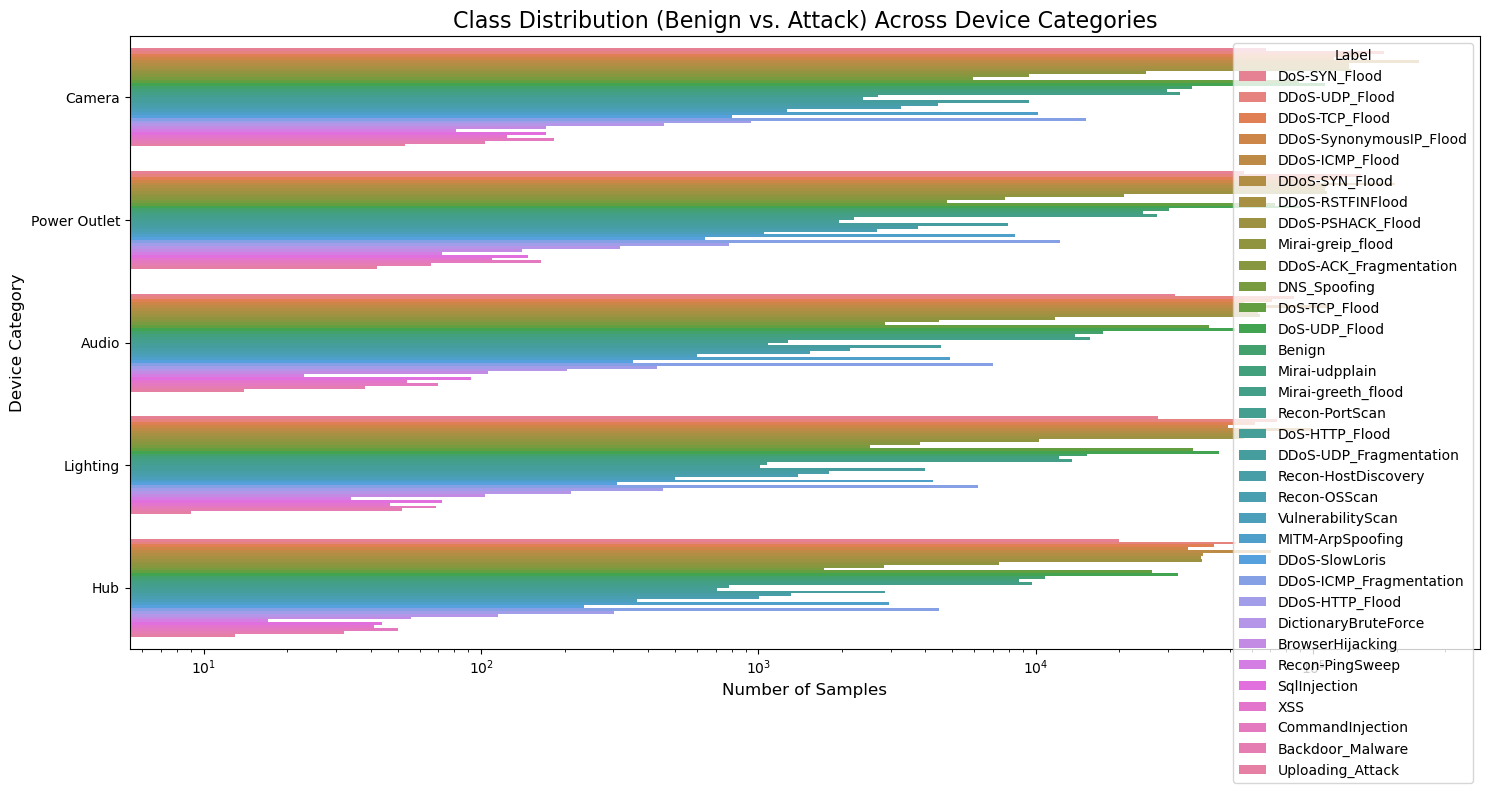


Step 4: Starting core analysis loop...

Analyzing Device Category: Audio
Dropping the following columns: ['label', 'device', 'device_category']
Training Random Forest model for Audio...
Evaluating model for Audio...

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        11
                 Benign       0.87      0.98      0.92      5225
       BrowserHijacking       1.00      0.06      0.12        32
       CommandInjection       0.83      0.24      0.37        21
 DDoS-ACK_Fragmentation       0.99      0.99      0.99      1340
        DDoS-HTTP_Flood       0.97      0.90      0.94       130
        DDoS-ICMP_Flood       1.00      1.00      1.00     33965
DDoS-ICMP_Fragmentation       0.99      0.99      0.99      2098
      DDoS-PSHACK_Flood       1.00      1.00      1.00     19234
       DDoS-RSTFINFlood       1.00      1.00      1.00     19034
         DDoS-SYN_Flood       1.00      1.0

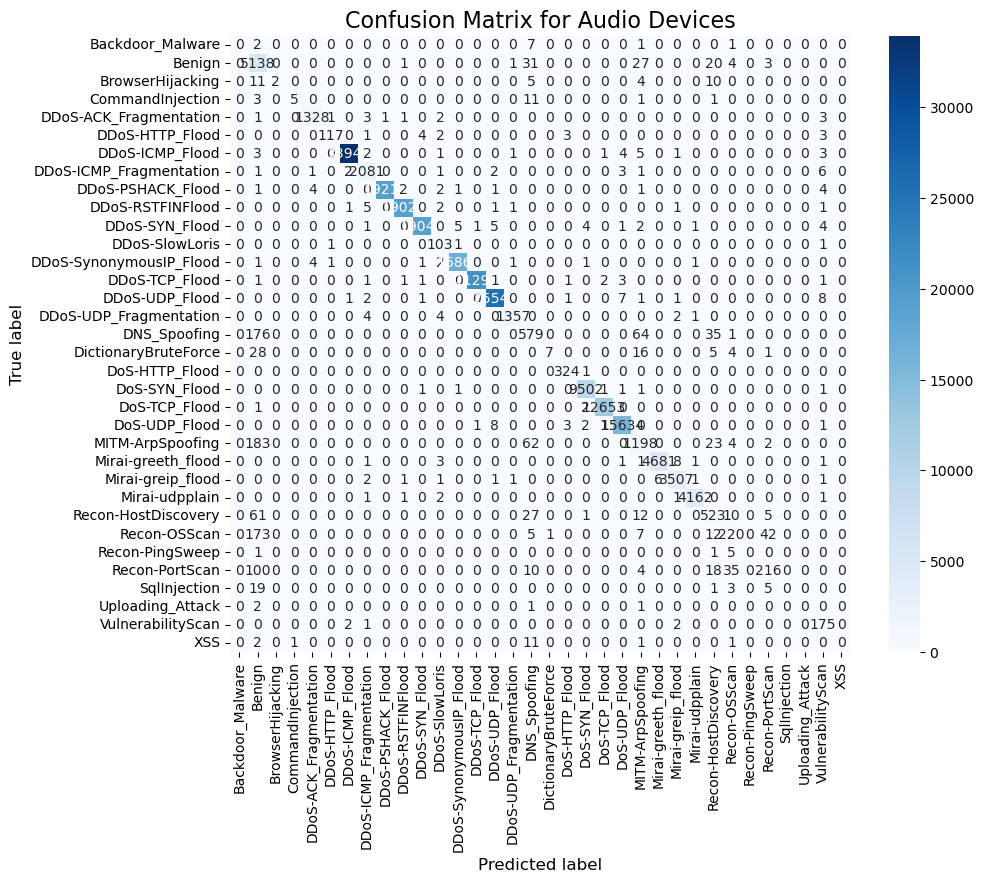


Analyzing Device Category: Camera
Dropping the following columns: ['label', 'device', 'device_category']
Training Random Forest model for Camera...
Evaluating model for Camera...

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.50      0.03      0.06        31
                 Benign       0.87      0.99      0.93     11018
       BrowserHijacking       0.50      0.04      0.07        52
       CommandInjection       1.00      0.15      0.25        55
 DDoS-ACK_Fragmentation       1.00      0.99      0.99      2837
        DDoS-HTTP_Flood       1.00      0.94      0.97       281
        DDoS-ICMP_Flood       1.00      1.00      1.00     72046
DDoS-ICMP_Fragmentation       0.99      0.99      0.99      4553
      DDoS-PSHACK_Flood       1.00      1.00      1.00     41120
       DDoS-RSTFINFlood       1.00      1.00      1.00     40474
         DDoS-SYN_Flood       1.00      1.00      1.00     40468
         DDoS-S

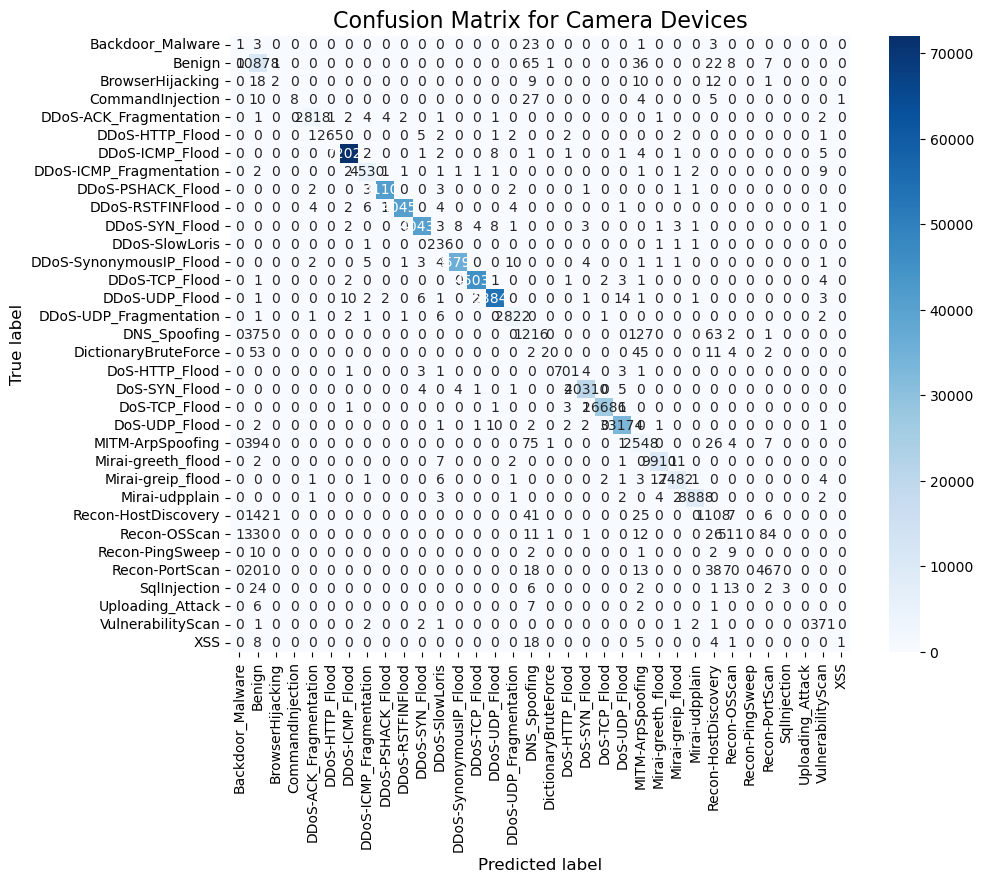


Analyzing Device Category: Lighting
Dropping the following columns: ['label', 'device', 'device_category']
Training Random Forest model for Lighting...
Evaluating model for Lighting...

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        15
                 Benign       0.86      0.99      0.92      4574
       BrowserHijacking       1.00      0.10      0.18        31
       CommandInjection       1.00      0.14      0.25        21
 DDoS-ACK_Fragmentation       0.99      0.99      0.99      1144
        DDoS-HTTP_Flood       0.98      0.94      0.96       136
        DDoS-ICMP_Flood       1.00      1.00      1.00     29739
DDoS-ICMP_Fragmentation       0.99      0.99      0.99      1855
      DDoS-PSHACK_Flood       1.00      1.00      1.00     16901
       DDoS-RSTFINFlood       1.00      1.00      1.00     16620
         DDoS-SYN_Flood       1.00      1.00      1.00     16785
         

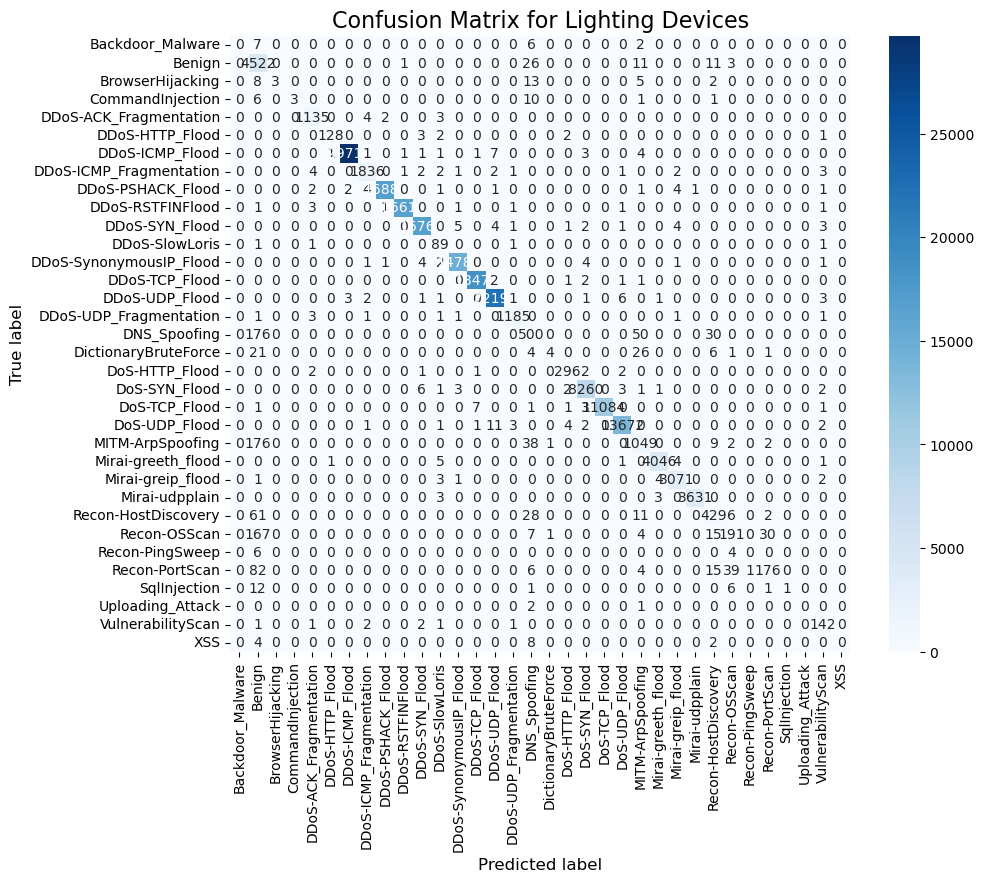


Analyzing Device Category: Power Outlet
Dropping the following columns: ['label', 'device', 'device_category']
Training Random Forest model for Power Outlet...
Evaluating model for Power Outlet...

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      0.05      0.10        20
                 Benign       0.88      0.99      0.93      9063
       BrowserHijacking       1.00      0.19      0.32        42
       CommandInjection       0.86      0.12      0.21        49
 DDoS-ACK_Fragmentation       0.99      0.99      0.99      2318
        DDoS-HTTP_Flood       0.97      0.96      0.97       234
        DDoS-ICMP_Flood       1.00      1.00      1.00     59446
DDoS-ICMP_Fragmentation       0.99      1.00      0.99      3682
      DDoS-PSHACK_Flood       1.00      1.00      1.00     33633
       DDoS-RSTFINFlood       1.00      1.00      1.00     33232
         DDoS-SYN_Flood       1.00      1.00      1.00     334

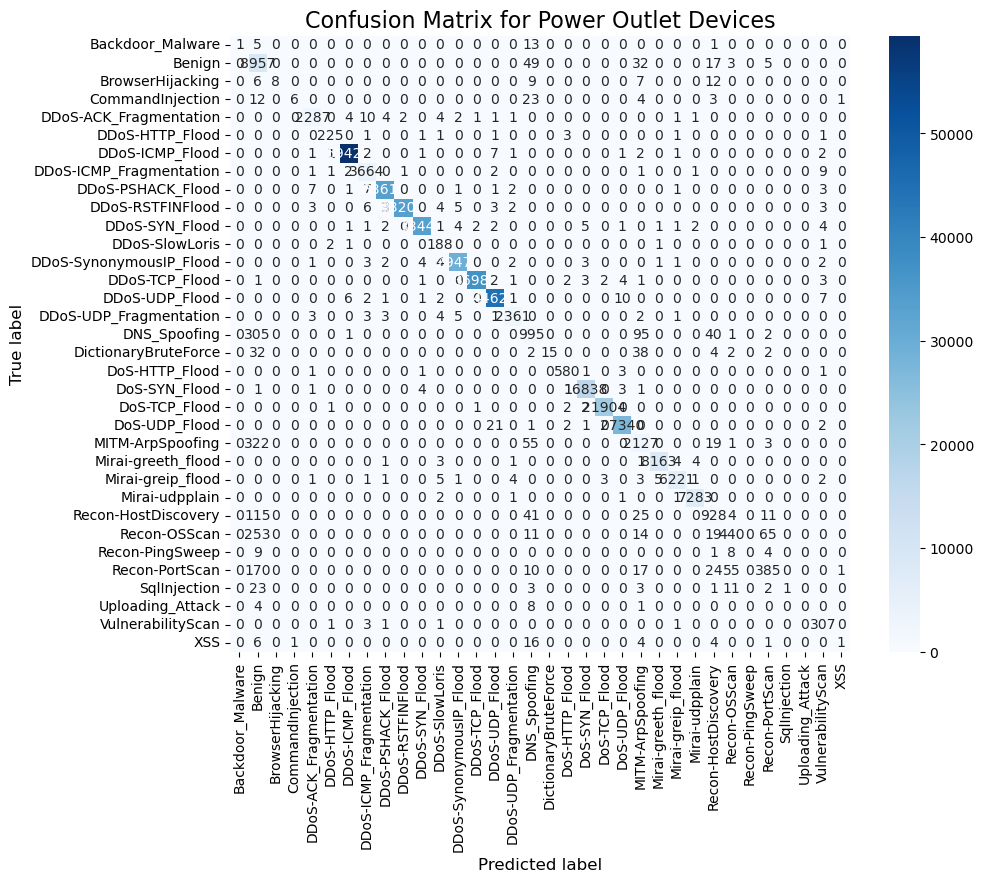


Analyzing Device Category: Hub
Dropping the following columns: ['label', 'device', 'device_category']
Training Random Forest model for Hub...
Evaluating model for Hub...

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        10
                 Benign       0.85      0.98      0.91      3243
       BrowserHijacking       0.00      0.00      0.00        17
       CommandInjection       0.75      0.20      0.32        15
 DDoS-ACK_Fragmentation       1.00      0.99      1.00       854
        DDoS-HTTP_Flood       0.98      0.92      0.95        90
        DDoS-ICMP_Flood       1.00      1.00      1.00     21200
DDoS-ICMP_Fragmentation       0.99      0.99      0.99      1340
      DDoS-PSHACK_Flood       1.00      1.00      1.00     11924
       DDoS-RSTFINFlood       1.00      1.00      1.00     11828
         DDoS-SYN_Flood       1.00      1.00      1.00     12006
         DDoS-SlowLoris 

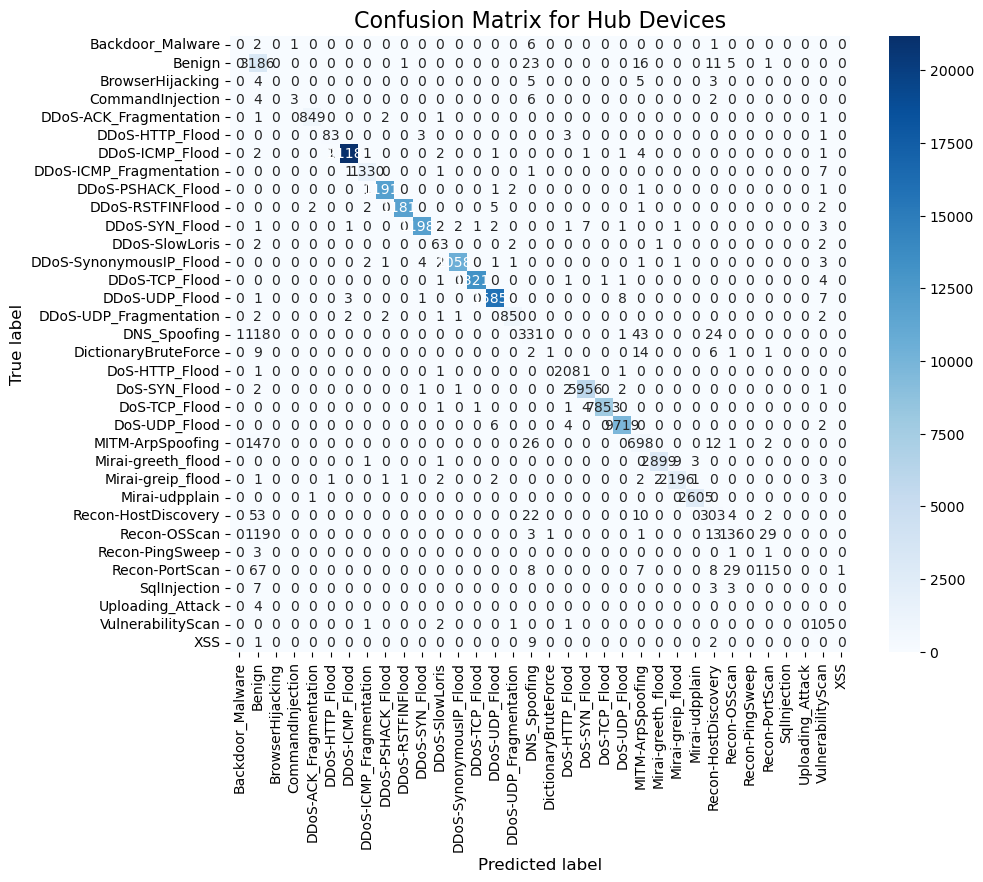


Step 5: Synthesizing results for final comparison...


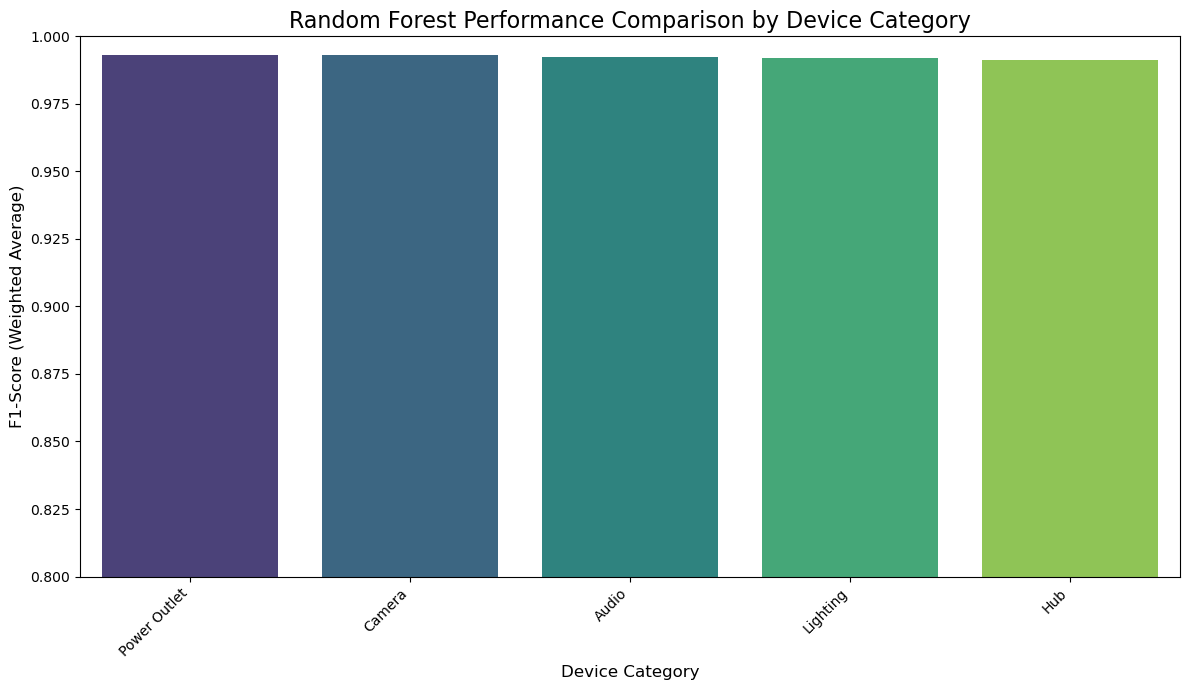

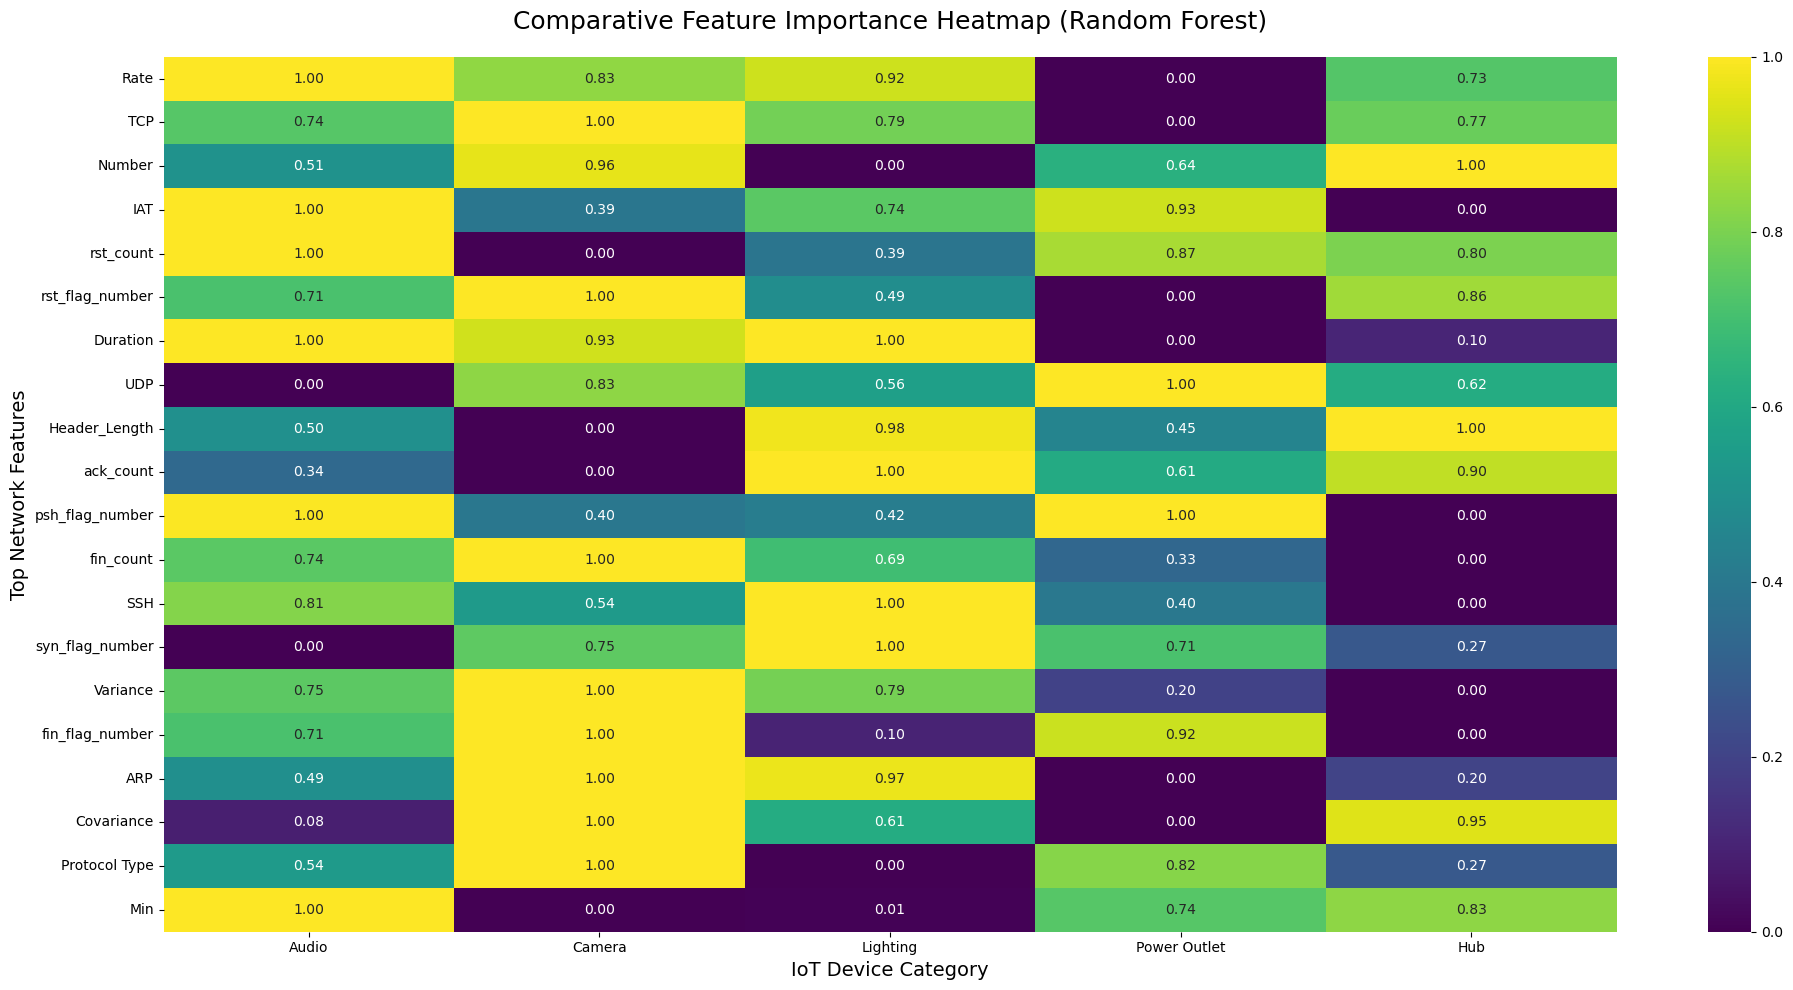



Analysis Complete.


In [8]:


import pandas as pd
import numpy as np
import os
import glob
from collections import Counter

# Scikit-learn for preprocessing, metrics, and the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For advanced feature explanation
import shap

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATASET_PATH = '/Users/bodapati/Downloads/wataiData 3/csv/CICIoT2023'
SAMPLING_FRACTION = 0.1 # Start low and increase if kernel doesn't crash
TOP_N_FEATURES = 20

# --- HELPER FUNCTION FOR PLOTTING ---
def plot_confusion_matrix(cm, classes, title):
    """This function prints and plots the confusion matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.show()

# --- 2. DATA LOADING & PREPARATION ---
print("\nStep 2: Loading and preparing the dataset...")
def load_and_prepare_data(path, sample_frac=0.1):
    all_files = glob.glob(os.path.join(path, "*.csv"))
    if not all_files:
        raise FileNotFoundError(f"No CSV files found in directory: {path}")
    print(f"Found {len(all_files)} CSV files. Loading...")
    df_list = [pd.read_csv(file).sample(frac=sample_frac, random_state=RANDOM_STATE) for file in all_files]
    df = pd.concat(df_list, ignore_index=True)
    print(f"Successfully loaded and combined data. Shape after sampling: {df.shape}")
    # Robustly drop columns with all NaN values and then drop rows with any NaN
    df.dropna(axis=1, how='all', inplace=True)
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    # Convert label to a more readable format
    df['label'] = df['label'].replace({'BenignTraffic': 'Benign'})
    print(f"Data shape after cleaning: {df.shape}")
    return df

main_df = load_and_prepare_data(DATASET_PATH, sample_frac=SAMPLING_FRACTION)

# --- 3. FEATURE ENGINEERING ---
print("\nStep 3: Engineering features - Mapping devices to categories...")
DEVICE_TO_CATEGORY_MAP = {
    'AMCREST WiFi Camera': 'Camera', 'Arlo Q Indoor Camera': 'Camera', 'Borun/Sichuan-AI Camera': 'Camera', 'DCS8000LHA1 D-Link Mini Camera': 'Camera', 'HeimVision Smart WiFi Camera': 'Camera', 'Home Eye Camera': 'Camera', 'Luohe Cam Dog': 'Camera', 'Nest Indoor Camera': 'Camera', 'Netatmo Camera': 'Camera', 'Rbcior Camera': 'Camera', 'SIMCAM 1S (AMPAKTec)': 'Camera', 'TP-Link Tapo Camera': 'Camera', 'Wyze Camera': 'Camera', 'Yi Indoor Camera': 'Camera', 'Yi Indoor 2 Camera': 'Camera', 'Yi Outdoor Camera': 'Camera', 'Eufy Doorbell Camera':'Camera', 'Amazon Alexa Echo Dot 1': 'Audio', 'Amazon Alexa Echo Dot 2': 'Audio', 'Amazon Alexa Echo Spot': 'Audio', 'Amazon Alexa Echo Studio': 'Audio', 'Amazon Echo Show': 'Audio', 'Google Nest Mini Speaker': 'Audio', 'harman kardon (Ampak Technology)': 'Audio', 'Sonos One Speaker': 'Audio', 'Teckin Plug 1': 'Power Outlet', 'Teckin Plug 2': 'Power Outlet', 'Wemo smart plug 1': 'Power Outlet', 'Wemo smart plug 2': 'Power Outlet', 'Yutron Plug 1': 'Power Outlet', 'Yutron Plug 2': 'Power Outlet', 'Amazon Plug': 'Power Outlet', 'Gosund Power strip (1)': 'Power Outlet', 'GoSund Power strip (2)': 'Power Outlet', 'GoSund Smart plug WP2 (1)': 'Power Outlet', 'GoSund Smart Plug WP2 (2)': 'Power Outlet', 'GoSund Smart Plug WP2 (3)': 'Power Outlet', 'GoSund Smart Plug WP3 (1)': 'Power Outlet', 'Gosund Smart Plug WP3 (2)': 'Power Outlet', 'Lumiman bulb': 'Lighting', 'Teckin Light Strip': 'Lighting', 'Globe Lamp ESP_B1680C': 'Lighting', 'GoSund Bulb': 'Lighting', 'HeimVision SmartLife Radio/Lamp': 'Lighting', 'LampUX RGB': 'Lighting', 'LIFX Lightbulb': 'Lighting', 'Arlo Base Station': 'Hub', 'Philips Hue Bridge': 'Hub', 'Eufy HomeBase 2': 'Hub', 'SmartThings Hub': 'Hub', 'AeoTec Smart Home Hub': 'Hub'
}
if 'device' not in main_df.columns:
    print("Warning: 'device' column not found. Creating a synthetic 'device' column for demonstration.")
    devices = list(DEVICE_TO_CATEGORY_MAP.keys())
    main_df['device'] = np.random.choice(devices, size=len(main_df))
main_df['device_category'] = main_df['device'].map(DEVICE_TO_CATEGORY_MAP)
main_df.dropna(subset=['device_category'], inplace=True)
print("Device categories created and mapped.")

# --- NEW VISUALIZATION: CLASS DISTRIBUTION ---
plt.figure(figsize=(15, 8))
sns.countplot(data=main_df, y='device_category', hue='label', order=main_df['device_category'].value_counts().index)
plt.title('Class Distribution (Benign vs. Attack) Across Device Categories', fontsize=16)
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Device Category', fontsize=12)
plt.xscale('log') # Use log scale due to heavy class imbalance
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# --- 4. CORE ANALYSIS LOOP ---
print("\nStep 4: Starting core analysis loop...")
all_results = {}
feature_importances_all_categories = {}
TARGET_CATEGORIES = main_df['device_category'].unique()

for category in TARGET_CATEGORIES:
    print(f"\n{'='*30}\nAnalyzing Device Category: {category}\n{'='*30}")
    category_df = main_df[main_df['device_category'] == category].copy()
    if len(category_df) < 100:
        print(f"Skipping '{category}' due to insufficient data.")
        continue

    # --- ROBUST FEATURE PREPARATION ---
    cols_to_drop = ['label', 'device', 'device_category', 'ts']
    existing_cols_to_drop = [col for col in cols_to_drop if col in category_df.columns]
    print(f"Dropping the following columns: {existing_cols_to_drop}")

    X = category_df.drop(columns=existing_cols_to_drop)
    y = category_df['label']
    X = X.select_dtypes(include=np.number)
    feature_names = X.columns.tolist() # Save feature names for later

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=RANDOM_STATE, stratify=y_encoded)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- MODEL TRAINING: RANDOM FOREST ---
    print(f"Training Random Forest model for {category}...")
    model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    print(f"Evaluating model for {category}...")
    y_pred = model.predict(X_test_scaled)

    # Store results
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    all_results[category] = report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # --- NEW VISUALIZATION: CONFUSION MATRIX ---
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=le.classes_, title=f'Confusion Matrix for {category} Devices')

    # --- FEATURE IMPORTANCE EXTRACTION ---
    importances = model.feature_importances_
    feature_importances_all_categories[category] = dict(zip(feature_names, importances))

# --- 5. SYNTHESIS & COMPARATIVE VISUALIZATION ---
print("\nStep 5: Synthesizing results for final comparison...")

# --- VISUALIZATION: OVERALL MODEL PERFORMANCE ---
f1_scores = {cat: data['weighted avg']['f1-score'] for cat, data in all_results.items()}
performance_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score (Weighted)'])
performance_df = performance_df.sort_values(by='F1-Score (Weighted)', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=performance_df.index, y=performance_df['F1-Score (Weighted)'], palette='viridis')
plt.title('Random Forest Performance Comparison by Device Category', fontsize=16)
plt.xlabel('Device Category', fontsize=12)
plt.ylabel('F1-Score (Weighted Average)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


# --- VISUALIZATION: FEATURE IMPORTANCE HEATMAP (ATTACK FINGERPRINTS) ---
importance_master_df = pd.DataFrame(feature_importances_all_categories).fillna(0)
importance_master_df = importance_master_df.T
# Normalize the importances across features for better visualization
normalized_importance_df = (importance_master_df - importance_master_df.min()) / (importance_master_df.max() - importance_master_df.min())
normalized_importance_df.dropna(axis=1, how='all', inplace=True) # Drop features that were never important

# Select the top N features based on their total importance across all categories
top_overall_features = normalized_importance_df.sum().sort_values(ascending=False).head(TOP_N_FEATURES).index

plt.figure(figsize=(20, 10))
sns.heatmap(normalized_importance_df[top_overall_features].T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Comparative Feature Importance Heatmap (Random Forest)', fontsize=18, pad=20)
plt.xlabel('IoT Device Category', fontsize=14)
plt.ylabel('Top Network Features', fontsize=14)
plt.tight_layout()
plt.show()

print("\n\nAnalysis Complete.")
